In [ ]:
import pandas as pd
import numpy as np

# Generating synthetic data

mu_range = (1e10, 5e11)      # Shear modulus (Pa), updated to 10 to 50 GPa
rho_range = (2500, 8000)     # Density (kg/m^3)
lambda_range = (2e10, 9e10)  # Lamé's first parameter (Pa), updated to 20 to 80 GPa
num_samples = 10000          # Number of samples to generate

# Generate random values for mu, rho, and lambda
np.random.seed(42)
mu_values = np.random.uniform(mu_range[0], mu_range[1], num_samples)
rho_values = np.random.uniform(rho_range[0], rho_range[1], num_samples)
lambda_values = np.random.uniform(lambda_range[0], lambda_range[1], num_samples)

# Compute velocities
vs = np.sqrt(mu_values / rho_values)  # S-wave velocity
vp = np.sqrt((lambda_values + 2 * mu_values) / rho_values)  # P-wave velocity

# Ensure realistic ranges for velocities
vs = np.clip(vs, 500, 5000)
vp = np.clip(vp, 1500, 12000)
density = rho_values
# Known constants
R = 3390  # Planet radius in km
mean_core_radius = 1700  # Mean core radius in km
mean_d = R - mean_core_radius  # Mean depth

# Generate synthetic depths (d) around the mean
np.random.seed(42)
true_d = np.random.normal(loc=mean_d, scale=100, size=10000)  # Depth with slight variability

# Ensure depths stay within valid bounds
true_d = np.clip(true_d,1390 , 1990)

ts_tp = 2 * true_d * (1 / vs - 1 / vp)

# Ensure ts_tp values are around 500 seconds
scaling_factor = 500 / np.mean(ts_tp)
ts_tp *= scaling_factor

# Calculate core radius
core_radius = R - true_d

# Prepare the dataset
data = pd.DataFrame({
    'vs': vs,
    'vp': vp,
    'ts_tp': ts_tp,
    'core_radius': core_radius,
    'density': density
})

# Feature engineering
data['feature'] = 1 / vs - 1 / vp

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


X = data[['ts_tp', 'feature','density']]
y = core_radius  # Core radius is the target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regression model
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f} km")
print(f"MSE: {mse:.2f} km^2")
print(f"R^2 Score: {r2:.2f}")





MAE: 4.40 km
MSE: 151.93 km^2
R^2 Score: 0.98


In [ ]:
example = pd.DataFrame({"ts_tp": [400], "feature": [1 /1825  - 1 / 3579],"density":[4000]})
predicted_core_radius = model.predict(example)
print(f"Predicted core radius: {predicted_core_radius[0]:.2f} km")

Predicted core radius: 1996.18 km


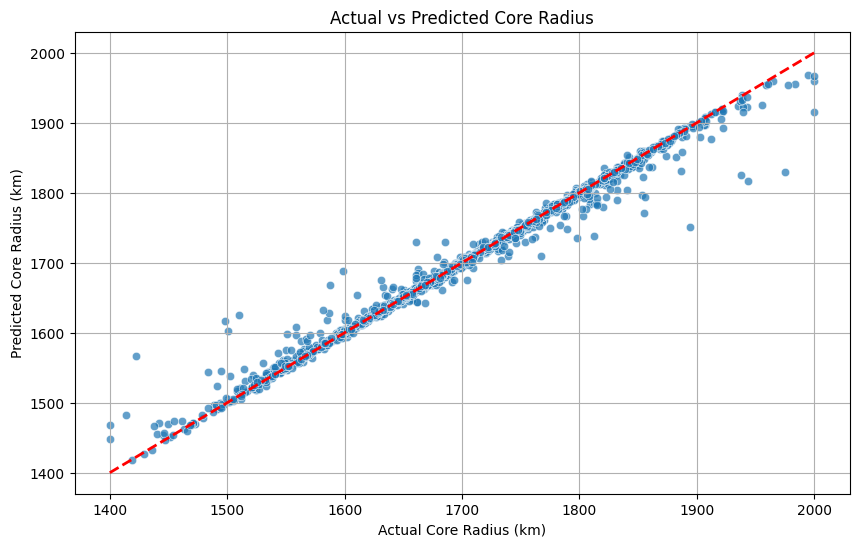

In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Core Radius (km)")
plt.ylabel("Predicted Core Radius (km)")
plt.title("Actual vs Predicted Core Radius")
plt.grid()
plt.show()






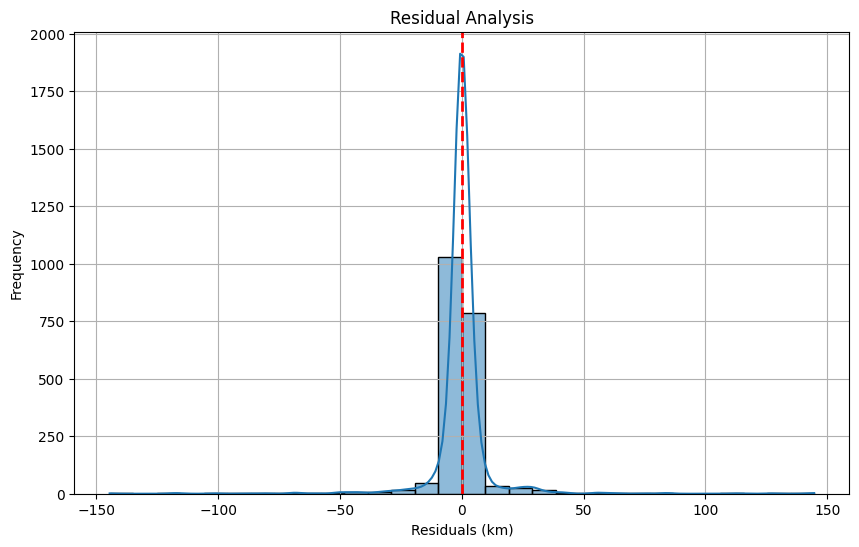

In [ ]:
# 2. Residual Analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True, bins=30)
plt.axvline(0, color='red', linestyle='--', linewidth=2)
plt.xlabel("Residuals (km)")
plt.ylabel("Frequency")
plt.title("Residual Analysis")
plt.grid()
plt.show()

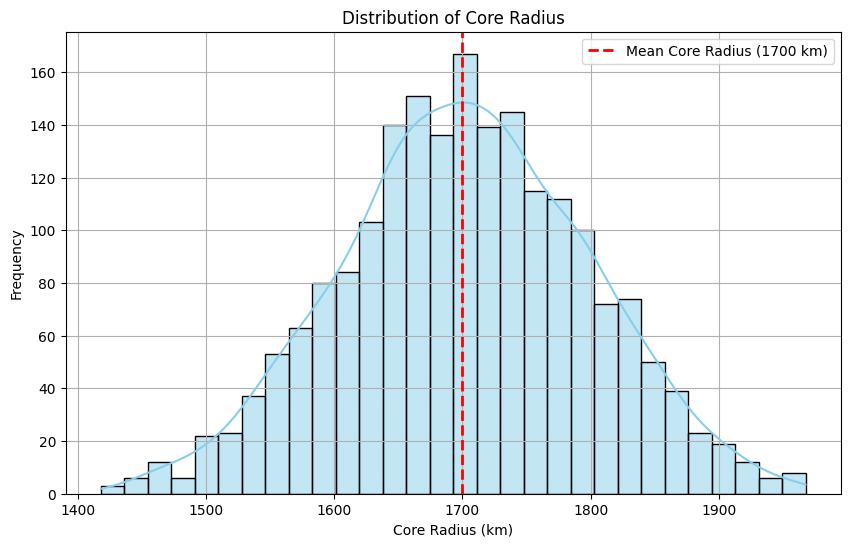

In [ ]:
#Distribution of core radius
plt.figure(figsize=(10, 6))
sns.histplot(y_pred, kde=True, bins=30, color='skyblue')
plt.axvline(1700, color='red', linestyle='--', linewidth=2, label='Mean Core Radius (1700 km)')
plt.xlabel('Core Radius (km)')
plt.ylabel('Frequency')
plt.title('Distribution of Core Radius')
plt.legend()
plt.grid()
plt.show()
